In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score, roc_curve
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/lending%2520club_scailing%2520(2).csv")
df.drop(['funded_amount', 'interest_rate', 'installment', 'total_pymnt', 'term1','total_rec_prncp'], axis=1, inplace=True)
ddf = pd.read_csv("/content/drive/MyDrive/lending%2520club_undummies_outlier%2520(2).csv")
df2 = ddf[['funded_amount', 'interest_rate', 'installment', 'total_pymnt','term1','total_rec_prncp']]
df = pd.concat([df,df2],axis=1)
df.columns

Index(['loan_amount', 'annual_income', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       ...
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'fico_score', 'funded_amount',
       'interest_rate', 'installment', 'total_pymnt', 'term1',
       'total_rec_prncp'],
      dtype='object', length=105)

In [ ]:
df.columns

Index(['loan_amount', 'annual_income', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       ...
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'fico_score', 'funded_amount',
       'interest_rate', 'installment', 'total_pymnt', 'term1',
       'total_rec_prncp'],
      dtype='object', length=105)

In [ ]:
x = df.drop(['depvar'],axis=1)
y = df['depvar']

X_train1, X_test1, y_train, y_test = train_test_split(x,y,test_size = 0.4,random_state=45)
X_val1, X_test1, y_val, y_test = train_test_split(X_test1,y_test, test_size=0.5,random_state=45)

#뒤에 1 있는 변수들 : 목적함수 사용에 필요하지만, 모델 돌리는 데는 필요 없는 변수를 포함한 변수
X_train = X_train1.drop(['funded_amount', 'interest_rate', 'installment', 'total_pymnt','term1','total_rec_prncp'], axis=1)
X_test  = X_test1.drop(['funded_amount', 'interest_rate', 'installment', 'total_pymnt','term1','total_rec_prncp'], axis=1)
X_val   = X_val1.drop(['funded_amount', 'interest_rate', 'installment', 'total_pymnt','term1','total_rec_prncp'], axis=1)

In [ ]:
X_train

,loan_amount,annual_income,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,...,emp_length,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,fico_score
29077,0.794872,0.001918,0.333066,0.000000,0.000,0.185185,0.000000,0.008045,0.082147,0.140351,...,0.909091,0.0,0.0,0.0,0.7,0.4,0.0,0.777778,0.0,0.000000
338698,0.179487,0.001180,0.117894,0.000000,0.000,0.086420,0.000000,0.000875,0.027905,0.064327,...,0.545455,0.0,0.0,0.0,0.0,0.3,0.0,0.777778,0.0,0.619946
567538,0.487179,0.002246,0.183147,0.034483,0.375,0.074074,0.000000,0.008168,0.090216,0.181287,...,0.181818,0.2,0.0,0.0,0.0,0.2,0.2,0.444444,0.2,0.026954
6306,0.102564,0.000443,0.435548,0.000000,0.125,0.197531,0.000000,0.003782,0.049311,0.204678,...,0.272727,0.9,0.3,0.0,0.0,0.9,0.0,0.111111,0.9,0.107817
534376,0.589744,0.001475,0.364892,0.000000,0.125,0.111111,0.000000,0.007583,0.077664,0.146199,...,0.363636,0.9,0.7,0.0,0.0,0.8,0.0,0.555556,0.0,0.188679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385604,0.435897,0.001320,0.508607,0.000000,0.000,0.271605,0.000000,0.009884,0.052561,0.216374,...,0.818182,0.9,0.8,0.0,0.5,0.9,0.0,0.888889,0.0,0.053908
573603,0.435897,0.001016,0.282026,0.000000,0.125,0.123457,0.000000,0.002864,0.063880,0.116959,...,0.272727,0.9,0.0,0.0,0.2,0.5,0.9,0.555556,0.9,0.134771
606141,0.615385,0.000967,0.425140,0.000000,0.000,0.111111,0.029412,0.008382,0.092570,0.116959,...,0.272727,0.0,0.0,1.0,0.0,0.8,0.0,0.888889,0.0,0.188679
399228,0.282051,0.000771,0.645917,0.000000,0.125,0.222222,0.000000,0.010254,0.058613,0.169591,...,0.454545,0.0,0.0,0.0,0.0,0.3,0.0,0.111111,0.0,0.242588


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 86.47%


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


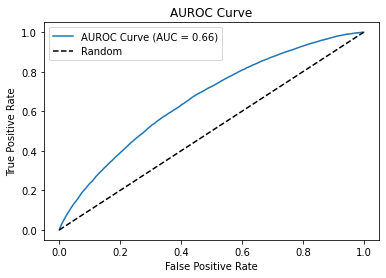

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_prob_test1=model.predict_proba(X_test)[:,1]
# roc_curve 함수를 사용하여 FPR, TPR 값을 계산합니다.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_test1)

# roc_auc_score 함수를 사용하여 AUROC 값을 계산합니다.
roc_auc = roc_auc_score(y_test, y_pred_prob_test1)

# AUROC 곡선을 그립니다.
plt.plot(fpr, tpr, label=f'AUROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC Curve')
plt.legend()
plt.show()

<AxesSubplot:ylabel='Frequency'>

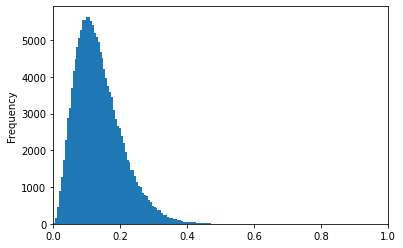

In [ ]:
# # 예측값 생성(Validation Set), histogram(frequency)
result = pd.DataFrame(model.predict_proba(X_val)[:,1], columns=['pred_prob'])
result.pred_prob.plot(kind='hist',bins=100, xlim=([0,1]))

# Test data 평가

In [277]:
test_df = pd.read_stata("/content/drive/MyDrive/lendingclub_test.dta")
test_df = test_df.rename(columns={"loan_amnt": "loan_amount", "funded_amnt": "funded_amount", "funded_amnt_inv": "investor_funds",
                       "int_rate": "interest_rate", "annual_inc": "annual_income"})

# 사전+사후 변수(더미 처리 전)

In [344]:
test_df_list = [test_df[i:i+int(len(test_df)/10)] for i in range(0, len(test_df), int(len(test_df)/10))]
test1_df=test_df_list[8] # 0~9까지 총 10개의 test set
y_test1=test1_df['depvar'] ### y_test
test1_df = test1_df[['loan_amount','funded_amount','interest_rate','total_pymnt','total_rec_prncp','investor_funds','installment','annual_income','dti','delinq_2yrs','fico_range_low','fico_range_high','inq_last_6mths','open_acc', 'pub_rec','revol_bal','revol_util','total_acc','last_fico_range_high','last_fico_range_low','collections_12_mths_ex_med', 'acc_now_delinq','tot_coll_amt','tot_cur_bal','chargeoff_within_12_mths', 'delinq_amnt','pub_rec_bankruptcies', 'tax_liens','emp_length1', 'emp_length2', 'emp_length3', 'emp_length4',
       'emp_length5', 'emp_length6', 'emp_length7', 'emp_length8',
       'emp_length9', 'emp_length10', 'emp_length11', 'emp_length12','home_ownership1', 'home_ownership2', 'home_ownership3',
       'home_ownership4', 'home_ownership5', 'home_ownership6','verification_status1', 'verification_status2', 'verification_status3',
            'purpose1', 'purpose2', 'purpose3', 'purpose4', 'purpose5', 'purpose6',
       'purpose7', 'purpose8', 'purpose9', 'purpose10', 'purpose11',
       'purpose12', 'purpose13', 'purpose14','addr_state1', 'addr_state2', 'addr_state3', 'addr_state4',
       'addr_state5', 'addr_state6', 'addr_state7', 'addr_state8',
       'addr_state9', 'addr_state10', 'addr_state11', 'addr_state12',
       'addr_state13', 'addr_state14', 'addr_state15', 'addr_state16',
       'addr_state17', 'addr_state18', 'addr_state19', 'addr_state20',
       'addr_state21', 'addr_state22', 'addr_state23', 'addr_state24',
       'addr_state25', 'addr_state26', 'addr_state27', 'addr_state28',
       'addr_state29', 'addr_state30', 'addr_state31', 'addr_state32',
       'addr_state33', 'addr_state34', 'addr_state35', 'addr_state36',
       'addr_state37', 'addr_state38', 'addr_state39', 'addr_state40',
       'addr_state41', 'addr_state42', 'addr_state43', 'addr_state44',
       'addr_state45', 'addr_state46', 'addr_state47', 'addr_state48',
       'addr_state49', 'addr_state50', 'addr_state51', 'term1', 'mths_since_last_delinq1', 'mths_since_last_delinq2',
       'mths_since_last_delinq3', 'mths_since_last_delinq4',
       'mths_since_last_delinq5', 'mths_since_last_delinq6',
       'mths_since_last_delinq7', 'mths_since_last_delinq8',
       'mths_since_last_delinq9', 'mths_since_last_delinq10',
       'mths_since_last_delinq11','mths_since_last_major_derog1', 'mths_since_last_major_derog2',
       'mths_since_last_major_derog3', 'mths_since_last_major_derog4',
       'mths_since_last_major_derog5', 'mths_since_last_major_derog6',
       'mths_since_last_major_derog7', 'mths_since_last_major_derog8',
       'mths_since_last_major_derog9', 'mths_since_last_major_derog10',
       'mths_since_last_major_derog11','mths_since_last_record1', 'mths_since_last_record2',
       'mths_since_last_record3', 'mths_since_last_record4',
       'mths_since_last_record5', 'mths_since_last_record6',
       'mths_since_last_record7', 'mths_since_last_record8',
       'mths_since_last_record9', 'mths_since_last_record10',
       'mths_since_last_record11','mths_since_rcnt_il1', 'mths_since_rcnt_il2', 'mths_since_rcnt_il3',
       'mths_since_rcnt_il4', 'mths_since_rcnt_il5', 'mths_since_rcnt_il6',
       'mths_since_rcnt_il7', 'mths_since_rcnt_il8', 'mths_since_rcnt_il9',
       'mths_since_rcnt_il10', 'mths_since_rcnt_il11', 'mths_since_recent_bc1', 'mths_since_recent_bc2',
       'mths_since_recent_bc3', 'mths_since_recent_bc4',
       'mths_since_recent_bc5', 'mths_since_recent_bc6',
       'mths_since_recent_bc7', 'mths_since_recent_bc8',
       'mths_since_recent_bc9', 'mths_since_recent_bc10',
       'mths_since_recent_bc11', 'mths_since_recent_bc_dlq1',
       'mths_since_recent_bc_dlq2', 'mths_since_recent_bc_dlq3',
       'mths_since_recent_bc_dlq4', 'mths_since_recent_bc_dlq5',
       'mths_since_recent_bc_dlq6', 'mths_since_recent_bc_dlq7',
       'mths_since_recent_bc_dlq8', 'mths_since_recent_bc_dlq9',
       'mths_since_recent_bc_dlq10', 'mths_since_recent_bc_dlq11','mths_since_recent_inq1', 'mths_since_recent_inq2',
       'mths_since_recent_inq3', 'mths_since_recent_inq4',
       'mths_since_recent_inq5', 'mths_since_recent_inq6',
       'mths_since_recent_inq7', 'mths_since_recent_inq8',
       'mths_since_recent_inq9', 'mths_since_recent_inq10', 'mths_since_recent_revol_delinq1', 'mths_since_recent_revol_delinq2',
       'mths_since_recent_revol_delinq3', 'mths_since_recent_revol_delinq4',
       'mths_since_recent_revol_delinq5', 'mths_since_recent_revol_delinq6',
       'mths_since_recent_revol_delinq7', 'mths_since_recent_revol_delinq8',
       'mths_since_recent_revol_delinq9', 'mths_since_recent_revol_delinq10',
       'mths_since_recent_revol_delinq11']]

In [345]:
test1_df

,loan_amount,funded_amount,interest_rate,total_pymnt,total_rec_prncp,investor_funds,installment,annual_income,dti,delinq_2yrs,...,mths_since_recent_revol_delinq2,mths_since_recent_revol_delinq3,mths_since_recent_revol_delinq4,mths_since_recent_revol_delinq5,mths_since_recent_revol_delinq6,mths_since_recent_revol_delinq7,mths_since_recent_revol_delinq8,mths_since_recent_revol_delinq9,mths_since_recent_revol_delinq10,mths_since_recent_revol_delinq11
174864,3600,3600,0.2099,2259.89000,376.18,3600.0,135.62,12000.0,8.00,0,...,0,0,0,0,0,0,0,0,0,0
174865,7000,7000,0.0697,7591.07610,7000.00,7000.0,216.05,150000.0,8.79,0,...,0,0,0,0,0,0,0,0,1,0
174866,18000,18000,0.0726,19791.32798,18000.00,18000.0,557.94,120000.0,10.62,0,...,0,0,0,0,0,0,0,0,0,0
174867,13000,13000,0.1049,15051.01104,13000.00,13000.0,422.48,72000.0,20.51,0,...,0,0,0,0,0,0,0,0,0,0
174868,19700,19700,0.1899,23158.39111,19700.00,19650.0,722.03,42000.0,30.20,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196717,16000,16000,0.0532,17336.64374,16000.00,16000.0,481.84,108000.0,14.16,0,...,0,0,0,0,0,0,0,0,0,0
196718,12775,12775,0.1199,15241.36638,12775.00,12775.0,424.26,53000.0,38.84,0,...,0,0,0,0,0,0,0,0,0,0
196719,16000,16000,0.1629,17954.11274,16000.00,16000.0,564.81,75000.0,18.13,0,...,0,0,0,0,0,1,0,0,0,0
196720,8800,8800,0.1153,10466.37614,8800.00,8800.0,290.32,49450.0,15.02,2,...,1,0,0,0,0,0,0,0,0,0


# 더미변수 처리

In [346]:
test1_df.drop(['purpose1','addr_state1','verification_status1','home_ownership1'], axis=1, inplace = True)

def undummify(df, prefix_sep="_"):
    cols2collapse = {
        item.split(prefix_sep)[0]: (prefix_sep in item) for item in df.columns
    }
    series_list = []
    for col, needs_to_collapse in cols2collapse.items():
        if needs_to_collapse:
            undummified = (
                df.filter(like=col)
                .idxmax(axis=1)
                .apply(lambda x: x.split(prefix_sep, maxsplit=1)[1])
                .rename(col)
            )
            series_list.append(undummified)
        else:
            series_list.append(df[col])
    undummified_df = pd.concat(series_list, axis=1)
    return undummified_df

<ipython-input-346-9d8c3a5c5cfe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1_df.drop(['purpose1','addr_state1','verification_status1','home_ownership1'], axis=1, inplace = True)


In [347]:
#emp_length
rename='emplength'
name='emp_length'
dic={};L=[]
for i in range(1,13):
    st = name + str(i)
    re = rename + '_' +str(i)
    L.append(st)
    dic[st]=re
emp_length=test1_df[L]
emp_length=emp_length.rename(columns=dic)

In [348]:
emp_length_df = undummify(emp_length)
emp_length_df.rename(columns={'emplength': 'emp_length'},inplace = True)
emp_length_df

,emp_length
174864,1
174865,11
174866,9
174867,4
174868,5
...,...
196717,2
196718,2
196719,3
196720,1


In [349]:
#mths_since_last_delinq
rename='mthssincelastdelinq'
name='mths_since_last_delinq'
dic={};L=[]
for i in range(1,12):
    st = name + str(i)
    re = rename + '_' +str(i)
    L.append(st)
    dic[st]=re
mths_since_last_delinq=test1_df[L]
mths_since_last_delinq=mths_since_last_delinq.rename(columns=dic)

mths_since_last_delinq_df = undummify(mths_since_last_delinq)
mths_since_last_delinq_df
mths_since_last_delinq_df.rename(columns={'mthssincelastdelinq': 'mths_since_last_delinq'},inplace = True)
mths_since_last_delinq_df

,mths_since_last_delinq
174864,1
174865,11
174866,10
174867,9
174868,1
...,...
196717,10
196718,1
196719,7
196720,2


In [350]:
# mths_since_last_major_derog
rename='mthssincelastmajorderog'
name='mths_since_last_major_derog'
dic={};L=[]
for i in range(1,12):
    st = name + str(i)
    re = rename + '_' +str(i)
    L.append(st)
    dic[st]=re
mths_since_last_major_derog=test1_df[L]
mths_since_last_major_derog=mths_since_last_major_derog.rename(columns=dic)

mths_since_last_major_derog_df = undummify(mths_since_last_major_derog)
mths_since_last_major_derog_df

mths_since_last_major_derog_df.rename(columns={'mthssincelastmajorderog': 'mths_since_last_major_derog'},inplace = True)
mths_since_last_major_derog_df

,mths_since_last_major_derog
174864,1
174865,10
174866,1
174867,1
174868,1
...,...
196717,9
196718,1
196719,6
196720,1


In [351]:
# mths_since_last_record
rename='mthssincelastrecord'
name='mths_since_last_record'
dic={};L=[]
for i in range(1,12):
    st = name + str(i)
    re = rename + '_' +str(i)
    L.append(st)
    dic[st]=re
mths_since_last_record=test1_df[L]
mths_since_last_record=mths_since_last_record.rename(columns=dic)

mths_since_last_record_df = undummify(mths_since_last_record)
mths_since_last_record_df

mths_since_last_record_df.rename(columns={'mthssincelastrecord': 'mths_since_last_record'},inplace = True)
mths_since_last_record_df

,mths_since_last_record
174864,1
174865,1
174866,1
174867,1
174868,8
...,...
196717,1
196718,1
196719,1
196720,1


In [352]:
# mths_since_rcnt_il
rename='mthssincercntil'
name='mths_since_rcnt_il'
dic={};L=[]
for i in range(1,12):
    st = name + str(i)
    re = rename + '_' +str(i)
    L.append(st)
    dic[st]=re
mths_since_rcnt_il=test1_df[L]
mths_since_rcnt_il=mths_since_rcnt_il.rename(columns=dic)

mths_since_rcnt_il_df = undummify(mths_since_rcnt_il)
mths_since_rcnt_il_df

mths_since_rcnt_il_df.rename(columns={'mthssincercntil': 'mths_since_rcnt_il'},inplace = True)
mths_since_rcnt_il_df

,mths_since_rcnt_il
174864,5
174865,6
174866,1
174867,10
174868,3
...,...
196717,6
196718,9
196719,1
196720,1


In [353]:
# mths_since_recent_bc
rename='mthssincerecentbc'
name='mths_since_recent_bc'
dic={};L=[]
for i in range(1,12):
    st = name + str(i)
    re = rename + '_' +str(i)
    L.append(st)
    dic[st]=re
mths_since_recent_bc=test1_df[L]
mths_since_recent_bc=mths_since_recent_bc.rename(columns=dic)

mths_since_recent_bc_df = undummify(mths_since_recent_bc)
mths_since_recent_bc_df

mths_since_recent_bc_df.rename(columns={'mthssincerecentbc': 'mths_since_recent_bc'},inplace = True)
mths_since_recent_bc_df

,mths_since_recent_bc
174864,2
174865,2
174866,3
174867,4
174868,9
...,...
196717,8
196718,9
196719,11
196720,6


In [354]:
# mths_since_recent_bc_dlq
rename='mthssincerecentbcdlq'
name='mths_since_recent_bc_dlq'
dic={};L=[]
for i in range(1,12):
    st = name + str(i)
    re = rename + '_' +str(i)
    L.append(st)
    dic[st]=re
mths_since_recent_bc_dlq=test1_df[L]
mths_since_recent_bc_dlq=mths_since_recent_bc_dlq.rename(columns=dic)

mths_since_recent_bc_dlq_df = undummify(mths_since_recent_bc_dlq)
mths_since_recent_bc_dlq_df

mths_since_recent_bc_dlq_df.rename(columns={'mthssincerecentbcdlq': 'mths_since_recent_bc_dlq'},inplace = True)
mths_since_recent_bc_dlq_df

,mths_since_recent_bc_dlq
174864,1
174865,10
174866,1
174867,1
174868,1
...,...
196717,1
196718,1
196719,1
196720,1


In [355]:
# mths_since_recent_inq
rename='mthssincerecentinq'
name='mths_since_recent_inq'
dic={};L=[]
for i in range(1,11):
    st = name + str(i)
    re = rename + '_' +str(i)
    L.append(st)
    dic[st]=re
mths_since_recent_inq=test1_df[L]
mths_since_recent_inq=mths_since_recent_inq.rename(columns=dic)

mths_since_recent_inq_df = undummify(mths_since_recent_inq)
mths_since_recent_inq_df

mths_since_recent_inq_df.rename(columns={'mthssincerecentinq': 'mths_since_recent_inq'},inplace = True)
mths_since_recent_inq_df

,mths_since_recent_inq
174864,9
174865,1
174866,7
174867,9
174868,10
...,...
196717,8
196718,3
196719,4
196720,8


In [356]:
# mths_since_recent_revol_delinq
rename='mthssincerecentrevoldelinq'
name='mths_since_recent_revol_delinq'
dic={};L=[]
for i in range(1,12):
    st = name + str(i)
    re = rename + '_' +str(i)
    L.append(st)
    dic[st]=re
mths_since_recent_revol_delinq=test1_df[L]
mths_since_recent_revol_delinq=mths_since_recent_revol_delinq.rename(columns=dic)

mths_since_recent_revol_delinq_df = undummify(mths_since_recent_revol_delinq)
mths_since_recent_revol_delinq_df

mths_since_recent_revol_delinq_df.rename(columns={'mthssincerecentrevoldelinq': 'mths_since_recent_revol_delinq'},inplace = True)
mths_since_recent_revol_delinq_df

,mths_since_recent_revol_delinq
174864,1
174865,10
174866,1
174867,1
174868,1
...,...
196717,1
196718,1
196719,7
196720,2


In [357]:
test1_df.drop(['emp_length1', 'emp_length2', 'emp_length3', 'emp_length4',
       'emp_length5', 'emp_length6', 'emp_length7', 'emp_length8',
       'emp_length9', 'emp_length10', 'emp_length11', 'emp_length12','mths_since_last_delinq1', 'mths_since_last_delinq2',
       'mths_since_last_delinq3', 'mths_since_last_delinq4',
       'mths_since_last_delinq5', 'mths_since_last_delinq6',
       'mths_since_last_delinq7', 'mths_since_last_delinq8',
       'mths_since_last_delinq9', 'mths_since_last_delinq10',
       'mths_since_last_delinq11','mths_since_last_major_derog1', 'mths_since_last_major_derog2',
       'mths_since_last_major_derog3', 'mths_since_last_major_derog4',
       'mths_since_last_major_derog5', 'mths_since_last_major_derog6',
       'mths_since_last_major_derog7', 'mths_since_last_major_derog8',
       'mths_since_last_major_derog9', 'mths_since_last_major_derog10',
       'mths_since_last_major_derog11','mths_since_last_record1', 'mths_since_last_record2',
       'mths_since_last_record3', 'mths_since_last_record4',
       'mths_since_last_record5', 'mths_since_last_record6',
       'mths_since_last_record7', 'mths_since_last_record8',
       'mths_since_last_record9', 'mths_since_last_record10',
       'mths_since_last_record11','mths_since_rcnt_il1', 'mths_since_rcnt_il2', 'mths_since_rcnt_il3',
       'mths_since_rcnt_il4', 'mths_since_rcnt_il5', 'mths_since_rcnt_il6',
       'mths_since_rcnt_il7', 'mths_since_rcnt_il8', 'mths_since_rcnt_il9',
       'mths_since_rcnt_il10', 'mths_since_rcnt_il11','mths_since_recent_bc1', 'mths_since_recent_bc2',
       'mths_since_recent_bc3', 'mths_since_recent_bc4',
       'mths_since_recent_bc5', 'mths_since_recent_bc6',
       'mths_since_recent_bc7', 'mths_since_recent_bc8',
       'mths_since_recent_bc9', 'mths_since_recent_bc10',
       'mths_since_recent_bc11','mths_since_recent_bc_dlq1',
       'mths_since_recent_bc_dlq2', 'mths_since_recent_bc_dlq3',
       'mths_since_recent_bc_dlq4', 'mths_since_recent_bc_dlq5',
       'mths_since_recent_bc_dlq6', 'mths_since_recent_bc_dlq7',
       'mths_since_recent_bc_dlq8', 'mths_since_recent_bc_dlq9',
       'mths_since_recent_bc_dlq10', 'mths_since_recent_bc_dlq11','mths_since_recent_inq1', 'mths_since_recent_inq2',
       'mths_since_recent_inq3', 'mths_since_recent_inq4',
       'mths_since_recent_inq5', 'mths_since_recent_inq6',
       'mths_since_recent_inq7', 'mths_since_recent_inq8',
       'mths_since_recent_inq9', 'mths_since_recent_inq10','mths_since_recent_revol_delinq1', 'mths_since_recent_revol_delinq2',
       'mths_since_recent_revol_delinq3', 'mths_since_recent_revol_delinq4',
       'mths_since_recent_revol_delinq5', 'mths_since_recent_revol_delinq6',
       'mths_since_recent_revol_delinq7', 'mths_since_recent_revol_delinq8',
       'mths_since_recent_revol_delinq9', 'mths_since_recent_revol_delinq10',
       'mths_since_recent_revol_delinq11','last_fico_range_high','last_fico_range_low' ], axis=1, inplace = True)


<ipython-input-357-62100d84e1ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1_df.drop(['emp_length1', 'emp_length2', 'emp_length3', 'emp_length4',


In [358]:
test1_df = pd.concat([test1_df,emp_length_df,mths_since_last_delinq_df,mths_since_last_major_derog_df,mths_since_last_record_df,mths_since_rcnt_il_df,mths_since_recent_bc_df,mths_since_recent_bc_dlq_df,mths_since_recent_inq_df,mths_since_recent_revol_delinq_df],axis=1)
test1_df

,loan_amount,funded_amount,interest_rate,total_pymnt,total_rec_prncp,investor_funds,installment,annual_income,dti,delinq_2yrs,...,term1,emp_length,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq
174864,3600,3600,0.2099,2259.89000,376.18,3600.0,135.62,12000.0,8.00,0,...,1,1,1,1,1,5,2,1,9,1
174865,7000,7000,0.0697,7591.07610,7000.00,7000.0,216.05,150000.0,8.79,0,...,1,11,11,10,1,6,2,10,1,10
174866,18000,18000,0.0726,19791.32798,18000.00,18000.0,557.94,120000.0,10.62,0,...,1,9,10,1,1,1,3,1,7,1
174867,13000,13000,0.1049,15051.01104,13000.00,13000.0,422.48,72000.0,20.51,0,...,1,4,9,1,1,10,4,1,9,1
174868,19700,19700,0.1899,23158.39111,19700.00,19650.0,722.03,42000.0,30.20,0,...,1,5,1,1,8,3,9,1,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196717,16000,16000,0.0532,17336.64374,16000.00,16000.0,481.84,108000.0,14.16,0,...,1,2,10,9,1,6,8,1,8,1
196718,12775,12775,0.1199,15241.36638,12775.00,12775.0,424.26,53000.0,38.84,0,...,1,2,1,1,1,9,9,1,3,1
196719,16000,16000,0.1629,17954.11274,16000.00,16000.0,564.81,75000.0,18.13,0,...,1,3,7,6,1,1,11,1,4,7
196720,8800,8800,0.1153,10466.37614,8800.00,8800.0,290.32,49450.0,15.02,2,...,1,1,2,1,1,1,6,1,8,2


In [359]:
# 더미변수 처리된 데이터 concat
test1_df2 = test1_df[['funded_amount', 'interest_rate', 'installment', 'total_pymnt','term1','total_rec_prncp']]
test1_df.drop(['funded_amount', 'interest_rate', 'installment', 'total_pymnt','term1','total_rec_prncp'],axis=1, inplace=True)
test1_df

,loan_amount,investor_funds,annual_income,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,...,addr_state51,emp_length,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq
174864,3600,3600.0,12000.0,8.00,0,710,714,0,15,0,...,0,1,1,1,1,5,2,1,9,1
174865,7000,7000.0,150000.0,8.79,0,675,679,0,5,0,...,0,11,11,10,1,6,2,10,1,10
174866,18000,18000.0,120000.0,10.62,0,685,689,0,25,0,...,0,9,10,1,1,1,3,1,7,1
174867,13000,13000.0,72000.0,20.51,0,685,689,0,15,0,...,0,4,9,1,1,10,4,1,9,1
174868,19700,19650.0,42000.0,30.20,0,675,679,0,6,1,...,0,5,1,1,8,3,9,1,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196717,16000,16000.0,108000.0,14.16,0,710,714,0,16,0,...,0,2,10,9,1,6,8,1,8,1
196718,12775,12775.0,53000.0,38.84,0,680,684,0,22,0,...,0,2,1,1,1,9,9,1,3,1
196719,16000,16000.0,75000.0,18.13,0,680,684,3,6,0,...,0,3,7,6,1,1,11,1,4,7
196720,8800,8800.0,49450.0,15.02,2,670,674,0,12,0,...,0,1,2,1,1,1,6,1,8,2


In [360]:
# FICO 점수 통합
test1_df['fico_score'] = 0.5*test1_df['fico_range_low'] + 0.5*test1_df['fico_range_high']
test1_df.drop(['fico_range_low', "fico_range_high"], axis = 1, inplace=True)

In [361]:
test1_df.drop(['investor_funds'], axis=1, inplace = True)

In [362]:
test1_df2

,funded_amount,interest_rate,installment,total_pymnt,term1,total_rec_prncp
174864,3600,0.2099,135.62,2259.89000,1,376.18
174865,7000,0.0697,216.05,7591.07610,1,7000.00
174866,18000,0.0726,557.94,19791.32798,1,18000.00
174867,13000,0.1049,422.48,15051.01104,1,13000.00
174868,19700,0.1899,722.03,23158.39111,1,19700.00
...,...,...,...,...,...,...
196717,16000,0.0532,481.84,17336.64374,1,16000.00
196718,12775,0.1199,424.26,15241.36638,1,12775.00
196719,16000,0.1629,564.81,17954.11274,1,16000.00
196720,8800,0.1153,290.32,10466.37614,1,8800.00


# 정규화(Test set)

In [363]:
df_filtered_float = test1_df.astype(float)
test1_df = (df_filtered_float - df_filtered_float.min())/(df_filtered_float.max() - df_filtered_float.min())
for column in test1_df.columns:
    try:
        test1_df[column] = test1_df[column].replace([np.inf, -np.inf], np.nan).fillna(value=0)
    except ZeroDivisionError:
        test1_df[column] = 0

In [364]:
tes_df = pd.concat([test1_df,test1_df2],axis=1)
tes_df.columns

Index(['loan_amount', 'annual_income', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       ...
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'fico_score', 'funded_amount',
       'interest_rate', 'installment', 'total_pymnt', 'term1',
       'total_rec_prncp'],
      dtype='object', length=104)

In [365]:
y_test1

174864    1.0
174865    0.0
174866    0.0
174867    0.0
174868    0.0
         ... 
196717    0.0
196718    0.0
196719    0.0
196720    0.0
196721    0.0
Name: depvar, Length: 21858, dtype: float32

# Final Test

# 손실 threshold = 0.15

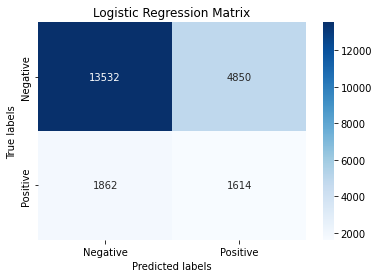

In [366]:
y_test1_pred=model.predict(test1_df)
result_test= pd.DataFrame(model.predict_proba(test1_df)[:,1], columns=['pred_prob'])

result_test.pred_prob.plot(kind='hist',bins=100, xlim=([-1,1]))

def pred_prob(result,cut_off):
    for i in range(len(result)):
        if result.loc[i,'pred_prob']>=cut_off:
            result.loc[i,'pred_prob']=1
        else:
            result.loc[i,'pred_prob']=0

pred_prob(result_test, 0.15) # 이익 -> 0.177, 손실 -> 0.15
y_pred_prob_test=result_test['pred_prob']

import matplotlib.pyplot as plt
import seaborn as sns

# y_test: 정답 레이블, y_pred_prob_test: 예측 결과 확률값
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test1, y_pred_prob_test.round()).ravel()

# 혼동 행렬 시각화
labels = ['Negative', 'Positive']
cm = [[tn_test, fp_test], [fn_test, tp_test]]

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g', cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_title('Logistic Regression Matrix')
plt.show()

In [376]:
precision = precision_score(y_test1, y_pred_prob_test)
print(precision)

recall = recall_score(y_test1, y_pred_prob_test)
print(recall)

f1 = f1_score(y_test1, y_pred_prob_test)
print(f1)

accuracy = accuracy_score(y_test1, y_pred_prob_test)
print(accuracy)

0.27198316183348925
0.3345799769850403
0.30005159958720334
0.751761368835209


In [368]:
def predict(cut_off): #threshold에 따른 predict dataframe 만들기
    result = pd.DataFrame(model.predict_proba(test1_df)[:,1], columns=['depvar_pred'])
    for i in range(len(result)):
        if result.loc[i,'depvar_pred']>=cut_off:
            result.loc[i,'depvar_pred']=1
        else:
            result.loc[i,'depvar_pred']=0
    return result['depvar_pred']

def loss(n,threshold):
    dep_pred = predict(threshold) #threshold 지정했을 때 y_pred값을 저장한 dataframe
    validation = pd.concat([tes_df,y_test1],axis=1)
    validation = validation.reset_index() #인덱스 0,1,2, ... 순으로 재정리하기. 다음 함수 실행할 때 필요함.
    validation = pd.concat([validation,dep_pred],axis=1)
    validation #원래의 X_validation 데이터프레임에 y_pred 값 이어붙이기

    w1=0; w2=0
    for idx in range(n):
        #부도를 내지 않을 것으로 예측했지만 부도를 낸 경우 손실 계산
        if validation['depvar'][idx] == 1 and validation['depvar_pred'][idx] == 0:
            installment_ = validation['installment'][idx]
            if validation['term1'][idx] == 1:
                term = 36
            else:
                term = 60
            total_pymnt_ = validation['total_pymnt'][idx]
            num = installment_*term - total_pymnt_ #월별상환액*기간 - 부도직전상환액
            w1 += num
        
        #부도를 낼 것으로 예측했지만 부도를 내지 않은 경우 손실 계산
        elif validation['depvar'][idx] == 0 and validation['depvar_pred'][idx] == 1:
            funded_amnt_ = validation['funded_amount'][idx]
            int_rate_ = validation['interest_rate'][idx]
            w2 += funded_amnt_*int_rate_ #이자금 (=총금액*이자율)
    
    loss = w1 + w2
    return loss

In [369]:
loss(21858,0.15)

25597328.153150003

# 이익 threshold = 0.177



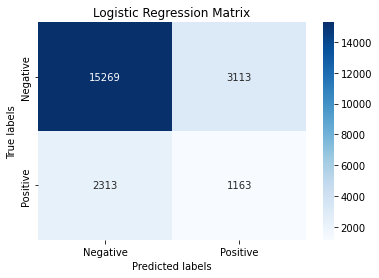

In [370]:
y_test1_pred=model.predict(test1_df)
result_test= pd.DataFrame(model.predict_proba(test1_df)[:,1], columns=['pred_prob'])

result_test.pred_prob.plot(kind='hist',bins=100, xlim=([-1,1]))

def pred_prob(result,cut_off):
    for i in range(len(result)):
        if result.loc[i,'pred_prob']>=cut_off:
            result.loc[i,'pred_prob']=1
        else:
            result.loc[i,'pred_prob']=0

pred_prob(result_test, 0.177) # 이익 -> 0.177, 손실 -> 0.15
y_pred_prob_test=result_test['pred_prob']

import matplotlib.pyplot as plt
import seaborn as sns

# y_test: 정답 레이블, y_pred_prob_test: 예측 결과 확률값
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test1, y_pred_prob_test.round()).ravel()

# 혼동 행렬 시각화
labels = ['Negative', 'Positive']
cm = [[tn_test, fp_test], [fn_test, tp_test]]

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g', cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_title('Logistic Regression Matrix')
plt.show()

In [371]:
precision = precision_score(y_test1, y_pred_prob_test)
print(precision)

recall = recall_score(y_test1, y_pred_prob_test)
print(recall)

f1 = f1_score(y_test1, y_pred_prob_test)
print(f1)

accuracy = accuracy_score(y_test1, y_pred_prob_test)
print(accuracy)

0.27198316183348925
0.3345799769850403
0.30005159958720334
0.751761368835209


In [372]:
def predict(cut_off): #threshold에 따른 predict dataframe 만들기
    result = pd.DataFrame(model.predict_proba(test1_df)[:,1], columns=['depvar_pred'])
    for i in range(len(result)):
        if result.loc[i,'depvar_pred']>=cut_off:
            result.loc[i,'depvar_pred']=1
        else:
            result.loc[i,'depvar_pred']=0
    return result['depvar_pred']

def income(n,threshold):
    dep_pred = predict(threshold) #threshold 지정했을 때 y_pred값을 저장한 dataframe
    validation = pd.concat([tes_df,y_test1],axis=1)
    validation = validation.reset_index() #인덱스 0,1,2, ... 순으로 재정리하기. 다음 함수 실행할 때 필요함.
    validation = pd.concat([validation,dep_pred],axis=1)
    validation #원래의 X_validation 데이터프레임에 y_pred 값 이어붙이기
    
    profit_1 = 0
    loss_1 = 0
    for idx in range(n):
        if validation['depvar'][idx] == 0 and validation['depvar_pred'][idx] == 0:
            funded_amnt_ = validation['funded_amount'][idx]
            int_rate_ = validation['interest_rate'][idx]
            profit_1 += funded_amnt_*int_rate_ #이자금 (=총금액*이자율)
        elif validation['depvar'][idx] == 1 and validation['depvar_pred'][idx] == 0:
            funded_amnt_ = validation['funded_amount'][idx]
            total_rec_ = validation['total_rec_prncp'][idx]
            loss_1 += funded_amnt_ - total_rec_ #대출금 - 월별상환액
        
    return profit_1-loss_1

In [373]:
income(21858,0.177)

5007202.929999758

In [374]:
def income1(n,threshold):
    dep_pred = predict(threshold) #threshold 지정했을 때 y_pred값을 저장한 dataframe
    validation = pd.concat([tes_df,y_test1],axis=1)
    validation = validation.reset_index() #인덱스 0,1,2, ... 순으로 재정리하기. 다음 함수 실행할 때 필요함.
    validation = pd.concat([validation,dep_pred],axis=1)
    validation #원래의 X_validation 데이터프레임에 y_pred 값 이어붙이기
    
    profit_1 = 0
    loss_1 = 0
    for idx in range(n):
        if validation['depvar'][idx] == 0:
            funded_amnt_ = validation['funded_amount'][idx]
            int_rate_ = validation['interest_rate'][idx]
            profit_1 += funded_amnt_*int_rate_ #이자금 (=총금액*이자율)
        elif validation['depvar'][idx] == 1:
            funded_amnt_ = validation['funded_amount'][idx]
            total_rec_ = validation['total_rec_prncp'][idx]
            loss_1 += funded_amnt_ - total_rec_ #대출금 - 월별상환액
        
    return profit_1-loss_1

In [375]:
income1(21858,0.170)

328659.83249977604